<a href="https://colab.research.google.com/github/rmpbastos/data_science/blob/master/_0012_Statistics_03_Standard_Deviation_and_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python libraries used in this article
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set default matplotlib parameters
LIGHT_GRAY = '#ababab'
MID_GRAY = '#898989'
DARK_GRAY = '#585858'
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = DARK_GRAY
mpl.rcParams['xtick.color'] = DARK_GRAY
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.color'] = DARK_GRAY
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['grid.color'] = LIGHT_GRAY
mpl.rcParams['grid.alpha'] = 0.1
mpl.rcParams['axes.edgecolor'] = LIGHT_GRAY
mpl.rcParams['patch.edgecolor'] = DARK_GRAY
mpl.rcParams['patch.linewidth'] = 0.5

# Statistics #03 - Standard Deviation and Variance

### Measuring Data Variability with a few codes in Python



---

![Statistics](https://raw.githubusercontent.com/rmpbastos/data_science/master/img/tolga-ulkan-9k36QqhA0cU-unsplash.jpg)

In this article, we'll take a closer look at how we can measure data variability. In the following sessions, you'll learn the basics of **Standard Deviation** and **Variance**.  This work is a sequence of the [previous article](https://bit.ly/3eyZ6HI) of this series, where we learned how to measure and visualize the spread of data.

If you haven't read the previous article, don't worry! Briefly speaking, we examined data dispersion, introducing the concepts of range, quartiles, and how box plots can help us visualize the data spread in our set.

Depending on your goals, it might suffice to have the range, the mean, or median of your set, for instance. But sometimes, you may need to go further and analyze the variability of your data, that is, how the values fluctuate around the set's mean. To that end, today we'll study the concepts of **variance** and **standard deviation**.

## Variance

In one sentence, variance is **the average of the squared differences from the mean**.

To understand what it  means, let's first take a look at the same data set used in the previous articles, where we have a list of 10 salaries, as below:

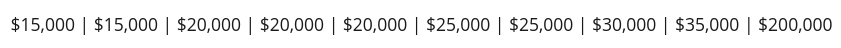

First of all, let's create a pandas DataFrame with our list of salaries, and then, let's observe the charts below to visualize the mean and how values are dispersed throughout the data set.

In [3]:
salaries = [15000, 15000, 20000, 20000, 20000, 25000, 25000, 30000, 35000, 200000]
salaries_df = pd.DataFrame(salaries, columns=["salaries"])

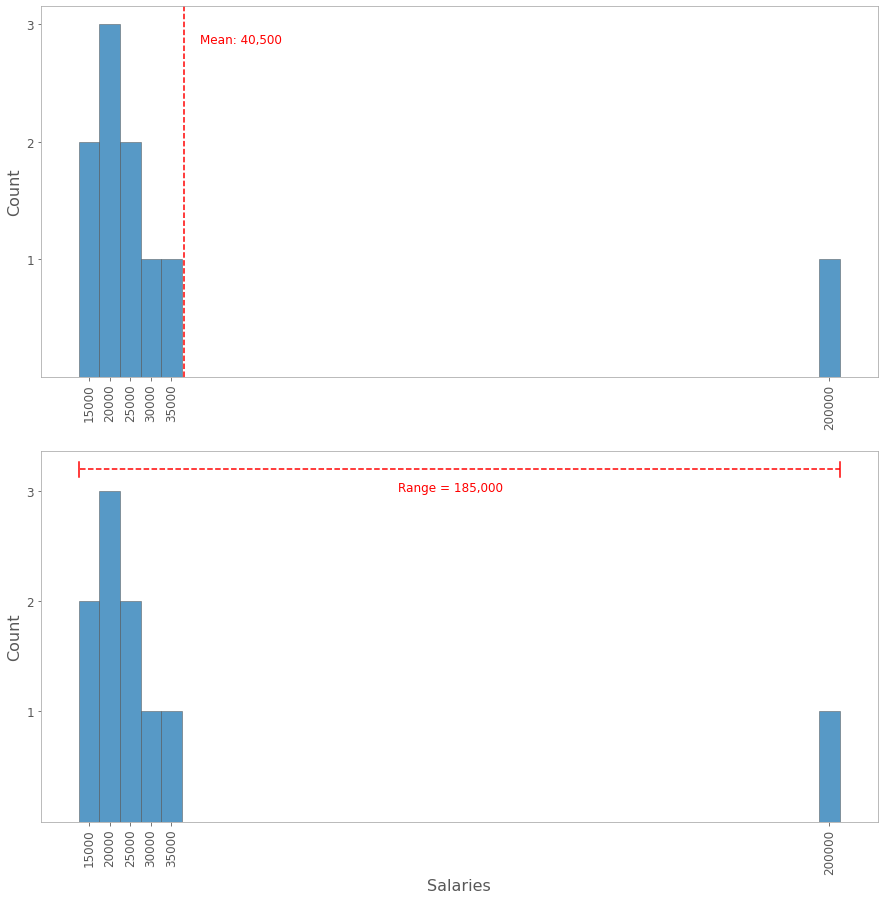

In [ ]:
# Draw the charts
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

yticks = [1, 2, 3]
xticks = [17500, 22500, 27500, 32500, 37500, 197500]
xlabels = [15000, 20000, 25000, 30000, 35000, 200000]

# Settings for both axes
for i in range(2):
  sns.histplot(data=salaries_df, bins=37, legend=None, ax=ax[i])
  ax[i].set_xticks(xticks)
  ax[i].set_xticklabels(labels=xlabels, rotation=90)
  ax[i].set_yticks(yticks)

# Settings for the first axis
ax[0].axvline(x=int(pd.DataFrame.mean(salaries_df)), color='r', linestyle='dashed', linewidth=1.5)
min_ylim, max_ylim = plt.ylim()
ax[0].text((int(pd.DataFrame.mean(salaries_df)))*1.1, max_ylim*0.9, 'Mean: {:,.0f}'.format((int(pd.DataFrame.mean(salaries_df)))), color="r", fontsize=12)

# Settings for the second axis
ax[1].axhline(y=3.2, xmin=0.047, xmax=0.955, color = 'r', linestyle='dashed', linewidth=1.5)
for val in (15000, 200000):
  ax[1].axvline(x=val, ymin=0.93, ymax=0.971, color='r', linewidth=1.5)

x_pos = (200000 - 15000) / 2
ax[1].text(x_pos, 3, "Range = 185,000", color='r', fontsize=12)
ax[1].set_xlabel("Salaries")

plt.show()


Notice that most of the values are concentrated around 15,000 and 35,000, but there is an extreme value (an outlier) of 200,000 that pushes up the mean to 40,500 and dilates the range to 185,000.

Now, going back to the concept introduced earlier, let's calculate the variance. We are going to add together the square of the differences of each point from the mean, and then divide it by the number of values in the set.

Remember that the mean ($\mu$) is 40,500. In **Python**, using a library called **Pandas**, we can simply write the following code to obtain the mean of a Pandas DataFrame:

In [ ]:
salaries_df.mean()

salaries    40500.0
dtype: float64

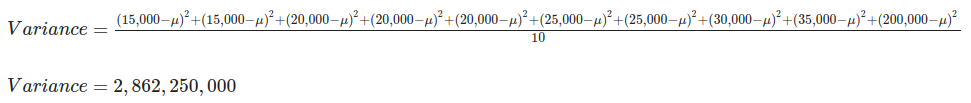

The variance is commonly represented as the Greek lowercase letter *Sigma* squared ($\sigma^2$). One way of finding the variance is using the following equation:

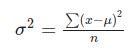

Where *x* represents each term in the set, $\mu$ is the mean, and *n* is the number of terms in the set.

There is also a quicker way to find the variance. Please check the equation below.

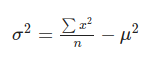

In Python, we can use this simple line of code to obtain the variance.

In [ ]:
salaries_df.var(ddof=0)

salaries    2.862250e+09
dtype: float64

Obs: Notice that I used the argument *ddof* and set it to zero. Don't bother with it. *ddof* stands for "Delta Degrees of Freedom" and I had to set it to zero because Python Pandas gives us the variance normalized by **n - ddof** and ddof is defined as *1* by default.

Ok, so now we have the value of the variance, but you might have noticed that it's extremely large! That is because the variance is measured using the values squared. 

You should be questioning yourself which insight you can get from such a huge number! Although the variance is widely used, there is another statistical concept that is more intuitive when we are measuring the variability of data around the mean. That is the **Standard Deviation**.

## Standard Deviation

After identifying the variance, finding the standard deviation is pretty straightforward. It's the **square root of the variance**.

Remember that the symbol of the variance is $\sigma^2$? The standard deviation is represented by $\sigma$.

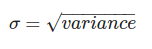

In our data set, the standard deviation will be:

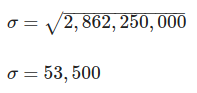

In Python, we can calculate it as follows:

In [ ]:
salaries_df.std(ddof=0)

salaries    53500.0
dtype: float64

Notice that *53,500* feels more connected to the values in our list, but what does it mean?

It means that the salaries in our list are, on average, $53,500 away from the mean.

The closer the values are from the mean, the smaller the standard deviation. In our case, the value of the standard deviation was stretched because we have an outlier.

Now, just to see how the standard deviation changes, let's eliminate the outlier. Our salaries' list now remains with 9 values:

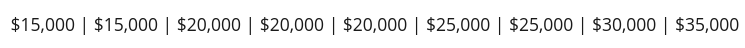

Once again, let's build a simple DataFrame from our new list of values and let Python give us the standard deviation.

In [9]:
salaries2 = [15000, 15000, 20000, 20000, 20000, 25000, 25000, 30000, 35000]
salaries2_df = pd.DataFrame(salaries2, columns=['salaries'])

In [5]:
salaries2_df.std(ddof=0)

Salaries    6285.393611
dtype: float64

In [54]:
salaries2_df.mean()

salaries    22777.777778
dtype: float64

Notice that without the outlier, the value of the standard deviation declined dramatically. Considering this new set of values, the salaries would be, on average, $6,285 away from the mean, which in this case is 22,777. 

## Conclusion

I hope this quick article may help you understand the concepts of **variance** and **standard deviation**. This is the third article of this series on introductory statistical concepts. If you are interested, you can find the previous article, about data dispersion, [here](https://bit.ly/3eyZ6HI).

Let's recap what we saw here today.

In statistics, **variance** and **standard deviation** help us measure the variability of the data, how the values fluctuate around the mean.

#### **Variance**

*   It's the average of the squared differences from the mean.
*   $\sigma^2 = \frac{\sum x^2}{n}-{\mu^2}$

#### **Standard Deviation**

*   It's the square root of the variance.
*   $\sigma = \sqrt{variance}$
*   Usually, more intuitive than the variance.





### Reference
[1] Griffiths, D. Head First Statistics: A Brain-Friendly Guide. O'Reilly, 2008.
